# Dióxido de Titanio (TiO₂)

El **TiO₂** es un óxido metálico ampliamente utilizado por su **alta estabilidad química**, **gran poder fotocatalítico** y **excelente capacidad para dispersar la luz ultravioleta**. Se presenta en tres fases cristalinas principales: **anatasa**, **rutilo** y **brookita**.
**Aplicaciones principales:**
- **Fotocatálisis:** degradación de contaminantes y división del agua (water splitting).  
- **Pigmentos y recubrimientos**  
- **Cosmética:** protector solar y filtros UV.  
- **Sensores y materiales avanzados:** en fotodetectores, catalizadores y nanocompuestos funcionales.


 <center><img src="materials/rutile_anatase.png" width="450"></center>

 **Características**

 - Los dos cuentan con sistema cristalino tetragonal


# Creación de nanoparticulas

In [28]:
# import library for the XRD
from pyxtal import pyxtal

In [29]:
#reading th .CIF structure -> ASE object
from ase.io import read

anatase = read('materials/TiO2_mp-390.cif')

In [30]:
print(anatase)

Atoms(symbols='Ti4O8', pbc=True, cell=[3.78253968, 3.78253968, 9.61502157], spacegroup_kinds=...)


In [31]:
from ase.visualize import view
view(anatase,viewer='x3d')


#### XRD con pyxtal

In [32]:
#Create a instance of the class pyxtal
material = pyxtal()

In [33]:
material.from_seed('materials/TiO2_mp-390.cif')

In [34]:
xrd = material.get_XRD()

/usr/local/lib/python3.12/dist-packages/pyxtal/XRD.py:133: RuntimeWarning: divide by zero encountered in scalar divide
  d_max = self.wavelength / np.sin(self.min2theta / 2) / 2


In [35]:
print(xrd)

  2theta     d_hkl     hkl       Intensity  Multi
  25.302     3.520   [ 1  0  1]   100.00        8
  36.754     2.445   [ 1  0  3]     6.06        8
  37.412     2.404   [ 0  0  4]    20.69        2
  38.518     2.337   [ 1  1  2]     7.10        8
  48.111     1.891   [ 2  0  0]    29.03        4
  53.452     1.714   [ 1  0  5]    19.59        8
  55.127     1.666   [ 2  1  1]    18.47       16
  62.037     1.496   [ 2  1  3]     2.99       16
  62.485     1.486   [ 2  0  4]    14.69        8
  68.224     1.375   [ 1  1  6]     7.05        8
  70.404     1.337   [ 2  2  0]     7.42        4
  73.326     1.291   [ 1  0  7]     0.59        8
  74.741     1.270   [ 2  1  5]    11.89       16
  76.146     1.250   [ 3  0  1]     3.12        8
  79.797     1.202   [ 0  0  8]     0.51        2
  82.149     1.173   [ 3  0  3]     0.72        8
  82.550     1.169   [ 2  2  4]     5.92        8
  83.235     1.161   [ 3  1  2]     2.16       16
  92.602     1.066   [ 2  1  7]     0.74       16


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'PXRD of O8Ti4'}, xlabel='2$\\Theta$ ($\\lambda$=1.54184 $\\AA$)', ylabel='Intensity'>)

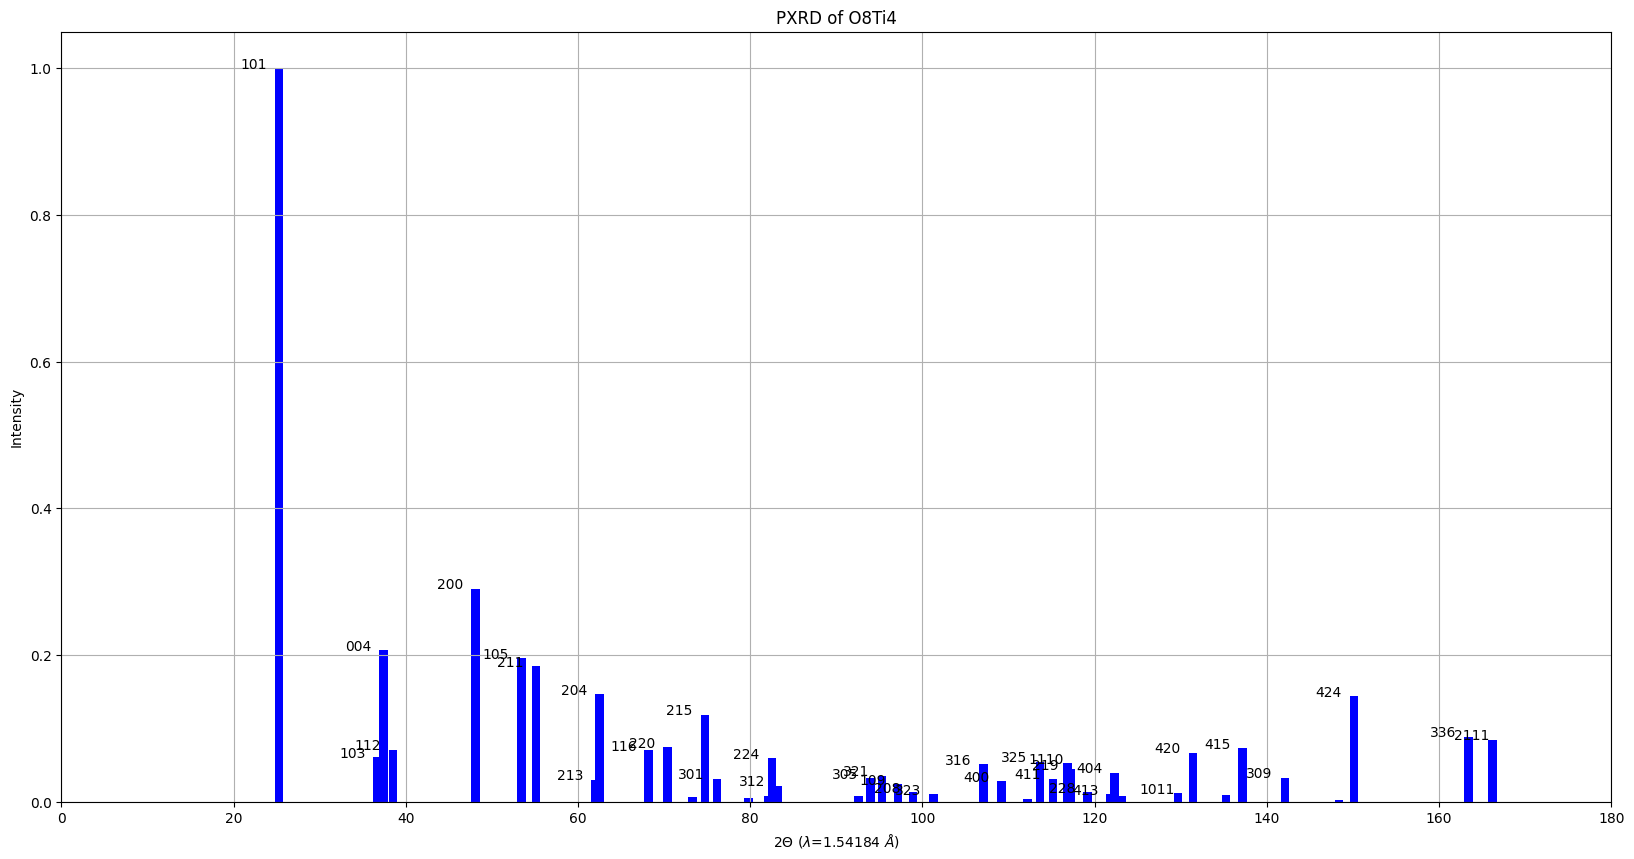

In [36]:
xrd.plot_pxrd()

In [37]:
#Building a surface for the (101)
from ase.build import surface
from ase.visualize import view

surface_anatase_1 = surface(lattice= anatase ,indices= (1,1,0), layers = 6, vacuum = 15)

In [38]:
view(surface_anatase_1,viewer='x3d')

In [39]:
#Building a surface for the (001)
from ase.build import surface
from ase.visualize import view

surface_anatase_2 = surface(lattice= anatase ,indices= (0,0,1), layers = 6, vacuum = 15)


view(surface_anatase_2,viewer='x3d')

# Creación de nanopartículas


In [40]:
import wulffpack
import ase
from ase.visualize import view

In [41]:
#Importar las respectivas librerías
from ase.io import read
from wulffpack import SingleCrystal
from ase.visualize import view

# Cargar la celda de anatasa desde un archivo .CIF
anatase = read('materials/TiO2_mp-390.cif')

# Definir energías superficiales (J/m²)
surface_energies = {
    (1, 0, 1): 0.49,
    (1, 0, 0): 0.58,
    (0, 0, 1): 0.98,
    (1, 0, 3): 0.89,
    (1, 1 ,0): 1.05
}
# Construir la nanopartícula con Wulffpack
particle = SingleCrystal(primitive_structure=anatase, surface_energies=surface_energies, natoms=1000)

# Visualizar la nanopartícula
view(particle.atoms, viewer='x3d')

 <center><img src="materials/nanoparticle.png" width="450"></center>

- La caras (101) y (001) son las dos presentes en la nanopartícula


# Conclusiones

- La anatasa al contar con dos caras con energía superficial diferente permite:     
    - Las caras (001) como tiene mayor energía superficial favorece la adsorción y la disociación
    - Las caras (101) son más estables
- Aunque anatasa funciona para catálisis, suele hacerse dopaje con metales de transición, aniones (N, C) para mejorar la eficiencia del material
- Estas nuevas combinaciones de TiO2 con otros metales de transición se asemejan a la forma de los Mxenes
- A pesar de sus múltiples funcionalidades e investigación creciente, en ningúna base de datos estudiada del curso o otro tipo de herramientas de búsqueda de materiales cuenta con la presencia de Mxenes, por lo que es una oportunidad para realizar simulaciones y enrriquecer las bases de datos